In [1]:
import torch
import numpy as np
import uncertainty_toolbox as uct
import uncertainty_toolbox.metrics as umetrics
from uncertainty_toolbox.metrics_calibration import (
    get_proportion_lists_vectorized,
)
import uncertainty_toolbox.viz as uviz
from uncertainty_toolbox.recalibration import iso_recal

from data import data_preprocess
from evaluation import metrics
from model import end2end_crps, end2end_gated

In [2]:
x_train, y_train, x_test, y_test = data_preprocess.data_preprocess('mpg')

In [3]:
end2end_model = end2end_gated.train_model(x_train, y_train, calibration_threshold = .03)

0 tensor([0.3968], grad_fn=<SigmoidBackward>) tensor(1022.5004, grad_fn=<MeanBackward0>) tensor(23.0191, grad_fn=<MeanBackward0>)
1 tensor([0.2880], grad_fn=<SigmoidBackward>) tensor(874.8131, grad_fn=<MeanBackward0>) tensor(22.9208, grad_fn=<MeanBackward0>)
2 tensor([0.2405], grad_fn=<SigmoidBackward>) tensor(723.4842, grad_fn=<MeanBackward0>) tensor(22.7259, grad_fn=<MeanBackward0>)
3 tensor([0.2084], grad_fn=<SigmoidBackward>) tensor(561.9409, grad_fn=<MeanBackward0>) tensor(22.4397, grad_fn=<MeanBackward0>)
4 tensor([0.1847], grad_fn=<SigmoidBackward>) tensor(425.9063, grad_fn=<MeanBackward0>) tensor(22.0797, grad_fn=<MeanBackward0>)
5 tensor([0.1663], grad_fn=<SigmoidBackward>) tensor(332.9087, grad_fn=<MeanBackward0>) tensor(21.6915, grad_fn=<MeanBackward0>)
6 tensor([0.1516], grad_fn=<SigmoidBackward>) tensor(269.4980, grad_fn=<MeanBackward0>) tensor(21.2965, grad_fn=<MeanBackward0>)
7 tensor([0.1396], grad_fn=<SigmoidBackward>) tensor(223.9505, grad_fn=<MeanBackward0>) tensor(2

70 tensor([0.0017], grad_fn=<SigmoidBackward>) tensor(7.9886, grad_fn=<MeanBackward0>) tensor(5.1066, grad_fn=<MeanBackward0>)
71 tensor([0.0017], grad_fn=<SigmoidBackward>) tensor(7.7835, grad_fn=<MeanBackward0>) tensor(4.9845, grad_fn=<MeanBackward0>)
72 tensor([0.0016], grad_fn=<SigmoidBackward>) tensor(7.5905, grad_fn=<MeanBackward0>) tensor(4.8679, grad_fn=<MeanBackward0>)
73 tensor([0.0015], grad_fn=<SigmoidBackward>) tensor(7.4089, grad_fn=<MeanBackward0>) tensor(4.7565, grad_fn=<MeanBackward0>)
74 tensor([0.0015], grad_fn=<SigmoidBackward>) tensor(7.2380, grad_fn=<MeanBackward0>) tensor(4.6502, grad_fn=<MeanBackward0>)
75 tensor([0.0015], grad_fn=<SigmoidBackward>) tensor(7.0771, grad_fn=<MeanBackward0>) tensor(4.5488, grad_fn=<MeanBackward0>)
76 tensor([0.0014], grad_fn=<SigmoidBackward>) tensor(6.9257, grad_fn=<MeanBackward0>) tensor(4.4523, grad_fn=<MeanBackward0>)
77 tensor([0.0014], grad_fn=<SigmoidBackward>) tensor(6.7830, grad_fn=<MeanBackward0>) tensor(4.3604, grad_fn=<

149 tensor([0.0008], grad_fn=<SigmoidBackward>) tensor(3.9501, grad_fn=<MeanBackward0>) tensor(2.3552, grad_fn=<MeanBackward0>)
150 tensor([0.0008], grad_fn=<SigmoidBackward>) tensor(3.9375, grad_fn=<MeanBackward0>) tensor(2.3446, grad_fn=<MeanBackward0>)
151 tensor([0.0008], grad_fn=<SigmoidBackward>) tensor(3.9251, grad_fn=<MeanBackward0>) tensor(2.3340, grad_fn=<MeanBackward0>)
152 tensor([0.0008], grad_fn=<SigmoidBackward>) tensor(3.9129, grad_fn=<MeanBackward0>) tensor(2.3237, grad_fn=<MeanBackward0>)
153 tensor([0.0008], grad_fn=<SigmoidBackward>) tensor(3.9010, grad_fn=<MeanBackward0>) tensor(2.3134, grad_fn=<MeanBackward0>)
154 tensor([0.0008], grad_fn=<SigmoidBackward>) tensor(3.8893, grad_fn=<MeanBackward0>) tensor(2.3035, grad_fn=<MeanBackward0>)
155 tensor([0.0008], grad_fn=<SigmoidBackward>) tensor(3.8779, grad_fn=<MeanBackward0>) tensor(2.2935, grad_fn=<MeanBackward0>)
156 tensor([0.0008], grad_fn=<SigmoidBackward>) tensor(3.8667, grad_fn=<MeanBackward0>) tensor(2.2840, g

229 tensor([0.0006], grad_fn=<SigmoidBackward>) tensor(3.3805, grad_fn=<MeanBackward0>) tensor(1.8296, grad_fn=<MeanBackward0>)
230 tensor([0.0006], grad_fn=<SigmoidBackward>) tensor(3.3763, grad_fn=<MeanBackward0>) tensor(1.8255, grad_fn=<MeanBackward0>)
231 tensor([0.0006], grad_fn=<SigmoidBackward>) tensor(3.3723, grad_fn=<MeanBackward0>) tensor(1.8215, grad_fn=<MeanBackward0>)
232 tensor([0.0006], grad_fn=<SigmoidBackward>) tensor(3.3682, grad_fn=<MeanBackward0>) tensor(1.8176, grad_fn=<MeanBackward0>)
233 tensor([0.0005], grad_fn=<SigmoidBackward>) tensor(3.3642, grad_fn=<MeanBackward0>) tensor(1.8137, grad_fn=<MeanBackward0>)
234 tensor([0.0005], grad_fn=<SigmoidBackward>) tensor(3.3603, grad_fn=<MeanBackward0>) tensor(1.8098, grad_fn=<MeanBackward0>)
235 tensor([0.0005], grad_fn=<SigmoidBackward>) tensor(3.3563, grad_fn=<MeanBackward0>) tensor(1.8060, grad_fn=<MeanBackward0>)
236 tensor([0.0005], grad_fn=<SigmoidBackward>) tensor(3.3525, grad_fn=<MeanBackward0>) tensor(1.8022, g

308 tensor([0.0004], grad_fn=<SigmoidBackward>) tensor(3.1309, grad_fn=<MeanBackward0>) tensor(1.6100, grad_fn=<MeanBackward0>)
309 tensor([0.0004], grad_fn=<SigmoidBackward>) tensor(3.1283, grad_fn=<MeanBackward0>) tensor(1.6082, grad_fn=<MeanBackward0>)
310 tensor([0.0004], grad_fn=<SigmoidBackward>) tensor(3.1258, grad_fn=<MeanBackward0>) tensor(1.6065, grad_fn=<MeanBackward0>)
311 tensor([0.0004], grad_fn=<SigmoidBackward>) tensor(3.1232, grad_fn=<MeanBackward0>) tensor(1.6048, grad_fn=<MeanBackward0>)
312 tensor([0.0004], grad_fn=<SigmoidBackward>) tensor(3.1207, grad_fn=<MeanBackward0>) tensor(1.6031, grad_fn=<MeanBackward0>)
313 tensor([0.0004], grad_fn=<SigmoidBackward>) tensor(3.1181, grad_fn=<MeanBackward0>) tensor(1.6015, grad_fn=<MeanBackward0>)
314 tensor([0.0004], grad_fn=<SigmoidBackward>) tensor(3.1156, grad_fn=<MeanBackward0>) tensor(1.5998, grad_fn=<MeanBackward0>)
315 tensor([0.0004], grad_fn=<SigmoidBackward>) tensor(3.1130, grad_fn=<MeanBackward0>) tensor(1.5982, g

388 tensor([0.0003], grad_fn=<SigmoidBackward>) tensor(2.9209, grad_fn=<MeanBackward0>) tensor(1.5021, grad_fn=<MeanBackward0>)
389 tensor([0.0003], grad_fn=<SigmoidBackward>) tensor(2.9181, grad_fn=<MeanBackward0>) tensor(1.5009, grad_fn=<MeanBackward0>)
390 tensor([0.0003], grad_fn=<SigmoidBackward>) tensor(2.9154, grad_fn=<MeanBackward0>) tensor(1.4997, grad_fn=<MeanBackward0>)
391 tensor([0.0003], grad_fn=<SigmoidBackward>) tensor(2.9127, grad_fn=<MeanBackward0>) tensor(1.4986, grad_fn=<MeanBackward0>)
392 tensor([0.0003], grad_fn=<SigmoidBackward>) tensor(2.9099, grad_fn=<MeanBackward0>) tensor(1.4974, grad_fn=<MeanBackward0>)
393 tensor([0.0003], grad_fn=<SigmoidBackward>) tensor(2.9072, grad_fn=<MeanBackward0>) tensor(1.4962, grad_fn=<MeanBackward0>)
394 tensor([0.0003], grad_fn=<SigmoidBackward>) tensor(2.9045, grad_fn=<MeanBackward0>) tensor(1.4950, grad_fn=<MeanBackward0>)
395 tensor([0.0003], grad_fn=<SigmoidBackward>) tensor(2.9017, grad_fn=<MeanBackward0>) tensor(1.4938, g

468 tensor([0.0002], grad_fn=<SigmoidBackward>) tensor(2.7589, grad_fn=<MeanBackward0>) tensor(1.4185, grad_fn=<MeanBackward0>)
469 tensor([0.0002], grad_fn=<SigmoidBackward>) tensor(2.7576, grad_fn=<MeanBackward0>) tensor(1.4184, grad_fn=<MeanBackward0>)
470 tensor([0.0002], grad_fn=<SigmoidBackward>) tensor(2.7562, grad_fn=<MeanBackward0>) tensor(1.4169, grad_fn=<MeanBackward0>)
471 tensor([0.0002], grad_fn=<SigmoidBackward>) tensor(2.7560, grad_fn=<MeanBackward0>) tensor(1.4172, grad_fn=<MeanBackward0>)
472 tensor([0.0002], grad_fn=<SigmoidBackward>) tensor(2.7551, grad_fn=<MeanBackward0>) tensor(1.4158, grad_fn=<MeanBackward0>)
473 tensor([0.0002], grad_fn=<SigmoidBackward>) tensor(2.7573, grad_fn=<MeanBackward0>) tensor(1.4173, grad_fn=<MeanBackward0>)
474 tensor([0.0002], grad_fn=<SigmoidBackward>) tensor(2.7576, grad_fn=<MeanBackward0>) tensor(1.4162, grad_fn=<MeanBackward0>)
475 tensor([0.0002], grad_fn=<SigmoidBackward>) tensor(2.7616, grad_fn=<MeanBackward0>) tensor(1.4186, g

542 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.6781, grad_fn=<MeanBackward0>) tensor(1.3655, grad_fn=<MeanBackward0>)
543 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.6802, grad_fn=<MeanBackward0>) tensor(1.3657, grad_fn=<MeanBackward0>)
544 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.6773, grad_fn=<MeanBackward0>) tensor(1.3649, grad_fn=<MeanBackward0>)
545 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.6770, grad_fn=<MeanBackward0>) tensor(1.3640, grad_fn=<MeanBackward0>)
546 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.6747, grad_fn=<MeanBackward0>) tensor(1.3635, grad_fn=<MeanBackward0>)
547 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.6744, grad_fn=<MeanBackward0>) tensor(1.3625, grad_fn=<MeanBackward0>)
548 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.6720, grad_fn=<MeanBackward0>) tensor(1.3620, grad_fn=<MeanBackward0>)
549 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.6716, grad_fn=<MeanBackward0>) tensor(1.3610, g

619 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.5966, grad_fn=<MeanBackward0>) tensor(1.3204, grad_fn=<MeanBackward0>)
620 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.5958, grad_fn=<MeanBackward0>) tensor(1.3215, grad_fn=<MeanBackward0>)
621 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.5977, grad_fn=<MeanBackward0>) tensor(1.3204, grad_fn=<MeanBackward0>)
622 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.5960, grad_fn=<MeanBackward0>) tensor(1.3214, grad_fn=<MeanBackward0>)
623 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.5934, grad_fn=<MeanBackward0>) tensor(1.3185, grad_fn=<MeanBackward0>)
624 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.5921, grad_fn=<MeanBackward0>) tensor(1.3195, grad_fn=<MeanBackward0>)
625 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.5927, grad_fn=<MeanBackward0>) tensor(1.3179, grad_fn=<MeanBackward0>)
626 tensor([0.0001], grad_fn=<SigmoidBackward>) tensor(2.5915, grad_fn=<MeanBackward0>) tensor(1.3191, g

697 tensor([7.4292e-05], grad_fn=<SigmoidBackward>) tensor(2.5201, grad_fn=<MeanBackward0>) tensor(1.2817, grad_fn=<MeanBackward0>)
698 tensor([7.3885e-05], grad_fn=<SigmoidBackward>) tensor(2.5193, grad_fn=<MeanBackward0>) tensor(1.2838, grad_fn=<MeanBackward0>)
699 tensor([7.3652e-05], grad_fn=<SigmoidBackward>) tensor(2.5187, grad_fn=<MeanBackward0>) tensor(1.2809, grad_fn=<MeanBackward0>)
700 tensor([7.3261e-05], grad_fn=<SigmoidBackward>) tensor(2.5173, grad_fn=<MeanBackward0>) tensor(1.2827, grad_fn=<MeanBackward0>)
701 tensor([7.3024e-05], grad_fn=<SigmoidBackward>) tensor(2.5168, grad_fn=<MeanBackward0>) tensor(1.2801, grad_fn=<MeanBackward0>)
702 tensor([7.2632e-05], grad_fn=<SigmoidBackward>) tensor(2.5155, grad_fn=<MeanBackward0>) tensor(1.2820, grad_fn=<MeanBackward0>)
703 tensor([7.2397e-05], grad_fn=<SigmoidBackward>) tensor(2.5151, grad_fn=<MeanBackward0>) tensor(1.2793, grad_fn=<MeanBackward0>)
704 tensor([7.1999e-05], grad_fn=<SigmoidBackward>) tensor(2.5143, grad_fn=<

776 tensor([5.2602e-05], grad_fn=<SigmoidBackward>) tensor(2.4678, grad_fn=<MeanBackward0>) tensor(1.2594, grad_fn=<MeanBackward0>)
777 tensor([5.2442e-05], grad_fn=<SigmoidBackward>) tensor(2.4673, grad_fn=<MeanBackward0>) tensor(1.2563, grad_fn=<MeanBackward0>)
778 tensor([5.2134e-05], grad_fn=<SigmoidBackward>) tensor(2.4678, grad_fn=<MeanBackward0>) tensor(1.2591, grad_fn=<MeanBackward0>)
779 tensor([5.1969e-05], grad_fn=<SigmoidBackward>) tensor(2.4675, grad_fn=<MeanBackward0>) tensor(1.2562, grad_fn=<MeanBackward0>)
780 tensor([5.1664e-05], grad_fn=<SigmoidBackward>) tensor(2.4675, grad_fn=<MeanBackward0>) tensor(1.2590, grad_fn=<MeanBackward0>)
781 tensor([5.1520e-05], grad_fn=<SigmoidBackward>) tensor(2.4660, grad_fn=<MeanBackward0>) tensor(1.2555, grad_fn=<MeanBackward0>)
782 tensor([5.1219e-05], grad_fn=<SigmoidBackward>) tensor(2.4658, grad_fn=<MeanBackward0>) tensor(1.2583, grad_fn=<MeanBackward0>)
783 tensor([5.1065e-05], grad_fn=<SigmoidBackward>) tensor(2.4651, grad_fn=<

854 tensor([3.7256e-05], grad_fn=<SigmoidBackward>) tensor(2.4320, grad_fn=<MeanBackward0>) tensor(1.2429, grad_fn=<MeanBackward0>)
855 tensor([3.7162e-05], grad_fn=<SigmoidBackward>) tensor(2.4300, grad_fn=<MeanBackward0>) tensor(1.2389, grad_fn=<MeanBackward0>)
856 tensor([3.6934e-05], grad_fn=<SigmoidBackward>) tensor(2.4310, grad_fn=<MeanBackward0>) tensor(1.2421, grad_fn=<MeanBackward0>)
857 tensor([3.6842e-05], grad_fn=<SigmoidBackward>) tensor(2.4288, grad_fn=<MeanBackward0>) tensor(1.2380, grad_fn=<MeanBackward0>)
858 tensor([3.6613e-05], grad_fn=<SigmoidBackward>) tensor(2.4294, grad_fn=<MeanBackward0>) tensor(1.2415, grad_fn=<MeanBackward0>)
859 tensor([3.6536e-05], grad_fn=<SigmoidBackward>) tensor(2.4263, grad_fn=<MeanBackward0>) tensor(1.2368, grad_fn=<MeanBackward0>)
860 tensor([3.6310e-05], grad_fn=<SigmoidBackward>) tensor(2.4272, grad_fn=<MeanBackward0>) tensor(1.2401, grad_fn=<MeanBackward0>)
861 tensor([3.6215e-05], grad_fn=<SigmoidBackward>) tensor(2.4251, grad_fn=<

933 tensor([2.6353e-05], grad_fn=<SigmoidBackward>) tensor(2.3903, grad_fn=<MeanBackward0>) tensor(1.2188, grad_fn=<MeanBackward0>)
934 tensor([2.6190e-05], grad_fn=<SigmoidBackward>) tensor(2.3909, grad_fn=<MeanBackward0>) tensor(1.2222, grad_fn=<MeanBackward0>)
935 tensor([2.6135e-05], grad_fn=<SigmoidBackward>) tensor(2.3858, grad_fn=<MeanBackward0>) tensor(1.2179, grad_fn=<MeanBackward0>)
936 tensor([2.5981e-05], grad_fn=<SigmoidBackward>) tensor(2.3863, grad_fn=<MeanBackward0>) tensor(1.2207, grad_fn=<MeanBackward0>)
937 tensor([2.5904e-05], grad_fn=<SigmoidBackward>) tensor(2.3849, grad_fn=<MeanBackward0>) tensor(1.2174, grad_fn=<MeanBackward0>)
938 tensor([2.5755e-05], grad_fn=<SigmoidBackward>) tensor(2.3850, grad_fn=<MeanBackward0>) tensor(1.2200, grad_fn=<MeanBackward0>)
939 tensor([2.5676e-05], grad_fn=<SigmoidBackward>) tensor(2.3842, grad_fn=<MeanBackward0>) tensor(1.2169, grad_fn=<MeanBackward0>)
940 tensor([2.5514e-05], grad_fn=<SigmoidBackward>) tensor(2.3863, grad_fn=<

End2end test MAPE:  0.0802518
End2end test RMSE:  2.6454928
End2end test NLLK:  2.688813
End2end test CRPS:  tensor(1.3593)


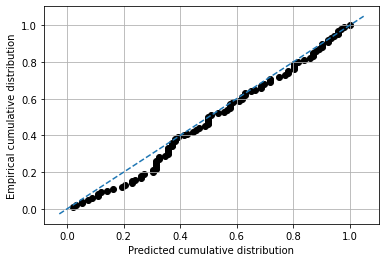

End2end test calibration error when step size is 0.001:  1.618035916824196
End2end test calibration error when step size is 0.01:  0.1606521739130434
End2end test calibration error when step size is 0.1:  0.017131379962192803


In [4]:
mean_pred, var_pred = end2end_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [5]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 10%|████▎                                      | 1/10 [00:00<00:00,  9.12it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 10%|████▎                                      | 1/10 [00:00<00:01,  8.43it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:01<00:00,  8.77it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           1.961
  RMSE          2.658
  MDAE          1.507
  MARPD         8.518
  R2            0.875
  Correlation   0.937
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.074
  Mean-absolute Calibration Error       0.070
  Miscalibration Area                   0.070
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.179
     Group Size: 0.56 -- Calibration Error: 0.114
     Group Size: 1.00 -- Calibration Error: 0.070
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.232
     Group Size: 0.56 -- Calibration Error: 0.114
     Group Size: 1.00 -- Calibration Error: 0.074
================

Lims is None. Setting lims now:
min_max_true: (11.0, 46.6)
min_max_pred: (11.952081, 44.52433)
lims: (11.0, 46.6)
lims_ext: (7.44000015258789, 50.1599983215332)


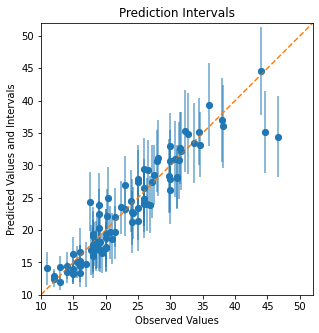

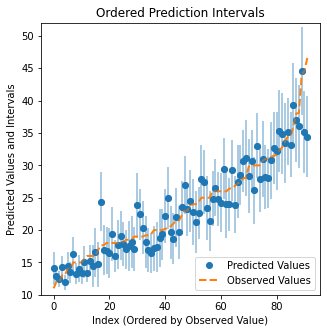

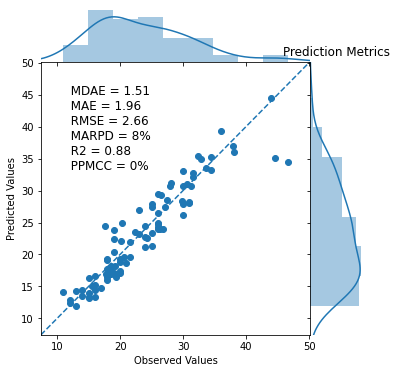

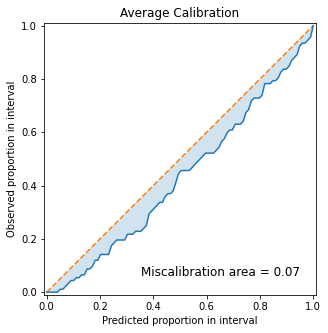

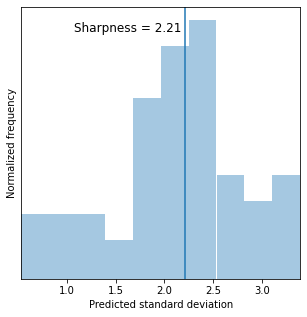

In [6]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))

In [3]:
nllk_model = end2end_crps.train_model_nllk(x_train, y_train, calibration_threshold = .03)

initial loss:  957.7034301757812
final loss:  2.4287729263305664


End2end test MAPE:  0.08224349
End2end test RMSE:  2.6103907
End2end test NLLK:  2.6428213
End2end test CRPS:  tensor(1.3459)


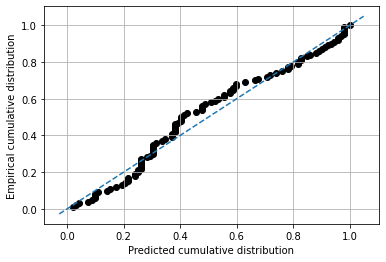

End2end test calibration error when step size is 0.001:  2.2573686200378074
End2end test calibration error when step size is 0.01:  0.2212240075614367
End2end test calibration error when step size is 0.1:  0.022069943289224948


In [4]:
mean_pred, var_pred = nllk_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [5]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 12.08it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.87it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.48it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           1.880
  RMSE          2.610
  MDAE          1.381
  MARPD         8.055
  R2            0.880
  Correlation   0.938
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.027
  Mean-absolute Calibration Error       0.023
  Miscalibration Area                   0.023
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.199
     Group Size: 0.56 -- Calibration Error: 0.069
     Group Size: 1.00 -- Calibration Error: 0.023
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.196
     Group Size: 0.56 -- Calibration Error: 0.069
     Group Size: 1.00 -- Calibration Error: 0.027
================

Lims is None. Setting lims now:
min_max_true: (11.0, 46.6)
min_max_pred: (12.7523775, 43.71681)
lims: (11.0, 46.6)
lims_ext: (7.44000015258789, 50.1599983215332)


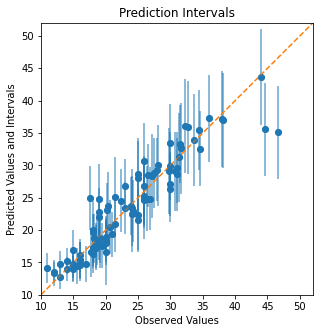

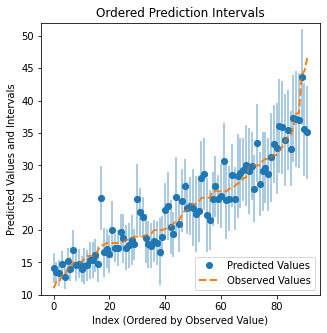

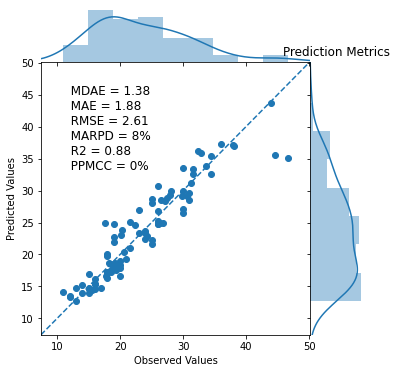

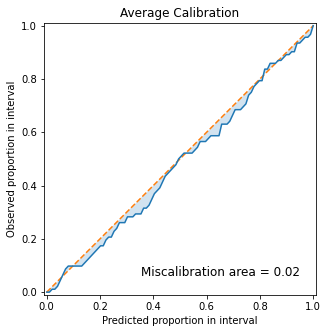

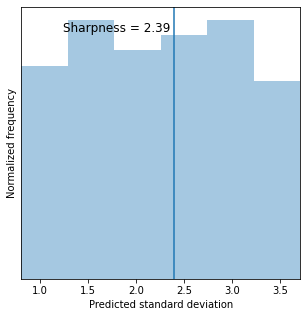

In [6]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))

In [7]:
crps_model = end2end_crps.train_model_crps(x_train, y_train, calibration_threshold = .03)

initial loss:  22.868846893310547
final loss:  1.1410934925079346


End2end test MAPE:  0.08442262
End2end test RMSE:  2.6967287
End2end test NLLK:  2.8467762
End2end test CRPS:  tensor(1.4188)


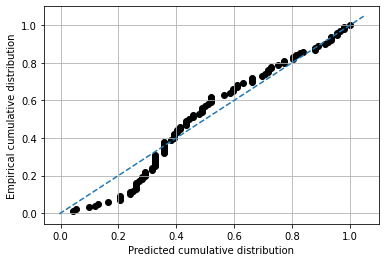

End2end test calibration error when step size is 0.001:  3.9199536862003783
End2end test calibration error when step size is 0.01:  0.39517958412098303
End2end test calibration error when step size is 0.1:  0.04026465028355389


In [8]:
mean_pred, var_pred = crps_model(x_test)
mean_pred = mean_pred.detach().numpy()
var_pred = var_pred.detach().numpy()
sd_pred = np.sqrt(var_pred)

print('End2end test MAPE: ', metrics.mape(y_test.detach().numpy(), mean_pred))
print('End2end test RMSE: ', metrics.rmse(y_test.detach().numpy(), mean_pred))
print('End2end test NLLK: ', metrics.nllk(y_test.detach().numpy(), mean_pred, var_pred))
print('End2end test CRPS: ', metrics.CRPSMetric(x = y_test.squeeze(dim = 1), loc = torch.tensor(mean_pred).squeeze(dim = 1), scale = torch.tensor(sd_pred).squeeze(dim = 1)).gaussian_crps().mean())

pcdf = metrics.pcdf(mean_pred.squeeze(1), var_pred.squeeze(1), y_test.detach().numpy().squeeze(1))
metrics.draw_pcdf(pcdf)
print('End2end test calibration error when step size is 0.001: ', metrics.calibration_error(pcdf, step = 0.001))
print('End2end test calibration error when step size is 0.01: ', metrics.calibration_error(pcdf, step = 0.01))
print('End2end test calibration error when step size is 0.1: ', metrics.calibration_error(pcdf, step = 0.1))

In [9]:
print(uct.metrics.get_all_metrics(mean_pred.squeeze(1), sd_pred.squeeze(1), y_test.detach().numpy().squeeze(1)))

 (1/n) Calculating accuracy metrics
 (2/n) Calculating average calibration metrics


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.69it/s]

 (3/n) Calculating adversarial group calibration metrics
  [1/2] for mean absolute calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


 20%|████████▌                                  | 2/10 [00:00<00:00, 11.88it/s]

  [2/2] for root mean squared calibration error
Measuring adversarial group calibration by spanning group size between 0.0 and 1.0, in 10 intervals


100%|██████████████████████████████████████████| 10/10 [00:00<00:00, 11.59it/s]

 (4/n) Calculating sharpness metrics
 (n/n) Calculating proper scoring rule metrics
**Finished Calculating All Metrics**


===================== Accuracy Metrics =====================
  MAE           1.974
  RMSE          2.697
  MDAE          1.615
  MARPD         8.283
  R2            0.872
  Correlation   0.935
=============== Average Calibration Metrics ================
  Root-mean-squared Calibration Error   0.092
  Mean-absolute Calibration Error       0.083
  Miscalibration Area                   0.084
========== Adversarial Group Calibration Metrics ===========
  Mean-absolute Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.229
     Group Size: 0.56 -- Calibration Error: 0.119
     Group Size: 1.00 -- Calibration Error: 0.083
  Root-mean-squared Adversarial Group Calibration Error
     Group Size: 0.11 -- Calibration Error: 0.256
     Group Size: 0.56 -- Calibration Error: 0.138
     Group Size: 1.00 -- Calibration Error: 0.092
================

Lims is None. Setting lims now:
min_max_true: (11.0, 46.6)
min_max_pred: (12.951715, 46.35418)
lims: (11.0, 46.6)
lims_ext: (7.44000015258789, 50.1599983215332)


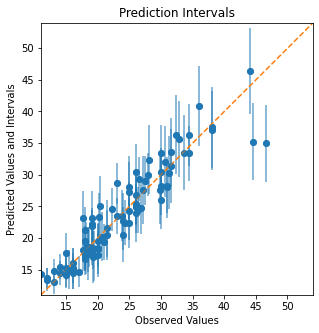

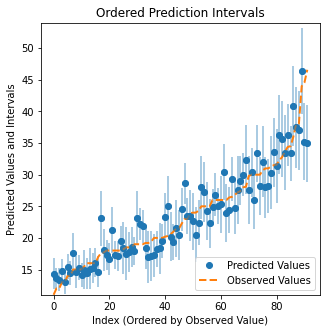

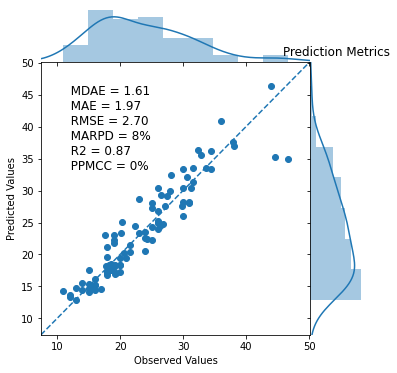

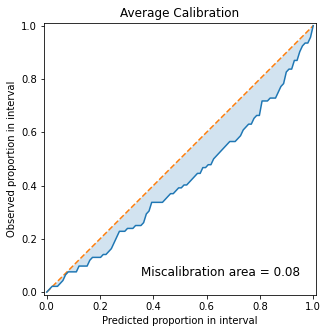

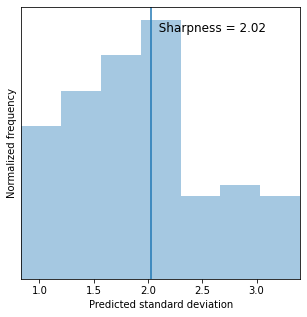

In [10]:
y = y_test.detach().numpy().squeeze(1)

uviz.plot_intervals(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_intervals_ordered(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_parity(mean_pred.squeeze(1), y)
uviz.plot_calibration(mean_pred.squeeze(1), sd_pred.squeeze(1), y)
uviz.plot_sharpness(sd_pred.squeeze(1))